In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the

import cv2
import math
# notebook rather than in a new window.
%matplotlib inline

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#Set seed for reproducbility
import torch

/Users/binggong/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/binggong/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/binggong/anaconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/binggong/anaconda3/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <42C20470-F879-3070-BF42-74C7B230A1A1> /Users/binggong/anaconda3/lib/python3.10/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you h

## Establish Convolutional Neural Network
In the last excierse, we had a basic training on how to use pytorch to load the data, and build a simple linear regression model on MNIST dataset for image classification. 

In this class, we will follow up the previous lecture, and do some exercise and learning how to use PyTorch to build more complicated convolutional neural networok for image classification task.

### Define Hyper-parameters

In [3]:
# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10  #MNIST contains 10 classes 
#An epoch is when all the training data is used at once and is defined as the total number of iterations of
# all the training data in one cycle for training the machine learning model
num_epochs = 5 
batch_size = 64 # how many samples for iteration
learning_rate = 0.001 # learning rate

### Load dataset

In [4]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=False)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor(),
                                          download=False)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### Build Convolutional Neural Network

In last notebook,we establish the fully connected nerual network, now you need to build a more complicated convolutional neural network.

Your task is to build a convolutional neural network, which consists of two convolutional layers. 

- The first layer should:

       *  Convolutional operation: Apply a 2D convolution over inputs(or output from previous layer). The convolutional operation sould have 16 outoput features, with kernel size of 5, stride of 1, and two pixels of padding applied on both sides.
       
       * Batch normalisation layer: apply a bach normalisation layer on the output of the previous convolutional operations, with output features of 16
       
       * Apply ReLu activation function
       * And apply Maximum pooling operations with kernel size of 2 ,  stride of 2
       
       
- The second layer is the same as first layer, but increase the output features from 16 to 32 for the convolutional operation and batch normalisation operation.

- In the end, apply a fully connected layer to connect the output of second layer and the number of classes (output)
    

hint: using the funciton of nn.Squential, nn.Conv2d, nn.Relu, and nn.MaxPool2d, nn.Linear

In [6]:

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        ###YOUR CODE ####
        self.layer1 = 
        ###YOUR CODE ####
        ###YOUR CODE ####
        self.layer2 = 
        self.fc =
        ###YOUR CODE ####
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
    
torch.manual_seed(3)
model = ConvNet(num_classes).to(device)
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 29034


### Define optimizer and loss


In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

### Train your model

In [8]:
# Train the model
losses = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    torch.manual_seed(28)
    for i, (images, labels) in enumerate(train_loader): 
        # Move tensors to the configured device
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
       
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            losses.append(loss.item())


Epoch [1/5], Step [100/938], Loss: 0.2048
Epoch [1/5], Step [200/938], Loss: 0.0950
Epoch [1/5], Step [300/938], Loss: 0.0570
Epoch [1/5], Step [400/938], Loss: 0.0993
Epoch [1/5], Step [500/938], Loss: 0.0768
Epoch [1/5], Step [600/938], Loss: 0.0099
Epoch [1/5], Step [700/938], Loss: 0.1283
Epoch [1/5], Step [800/938], Loss: 0.0816
Epoch [1/5], Step [900/938], Loss: 0.0631
Epoch [2/5], Step [100/938], Loss: 0.0542
Epoch [2/5], Step [200/938], Loss: 0.0194
Epoch [2/5], Step [300/938], Loss: 0.0171
Epoch [2/5], Step [400/938], Loss: 0.0150
Epoch [2/5], Step [500/938], Loss: 0.0318
Epoch [2/5], Step [600/938], Loss: 0.0038
Epoch [2/5], Step [700/938], Loss: 0.1037
Epoch [2/5], Step [800/938], Loss: 0.0604
Epoch [2/5], Step [900/938], Loss: 0.0655
Epoch [3/5], Step [100/938], Loss: 0.0281
Epoch [3/5], Step [200/938], Loss: 0.0264
Epoch [3/5], Step [300/938], Loss: 0.0076
Epoch [3/5], Step [400/938], Loss: 0.0113


KeyboardInterrupt: 

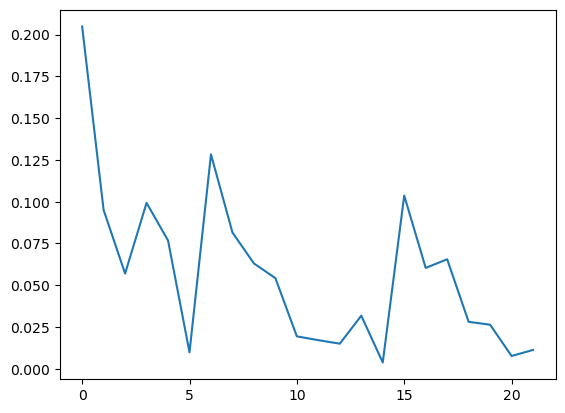

In [9]:
plt.plot(list(range(len(losses))),losses)

### Test the results

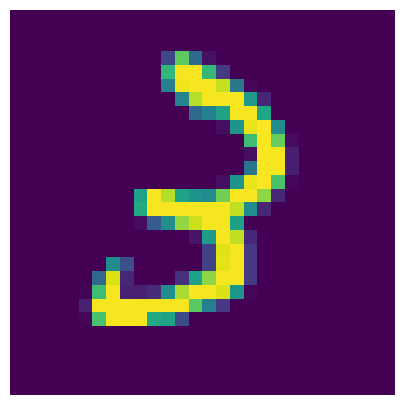

real data tensor(3)
Predicted tensor(3)


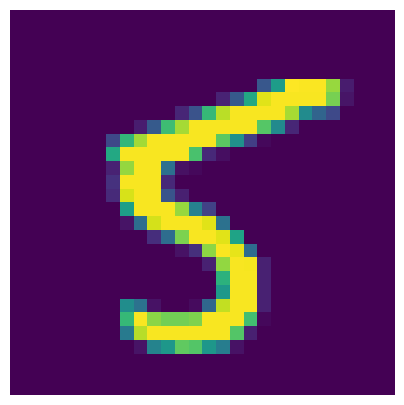

real data tensor(5)
Predicted tensor(5)


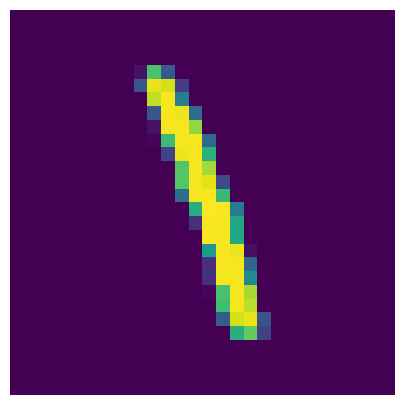

real data tensor(1)
Predicted tensor(1)


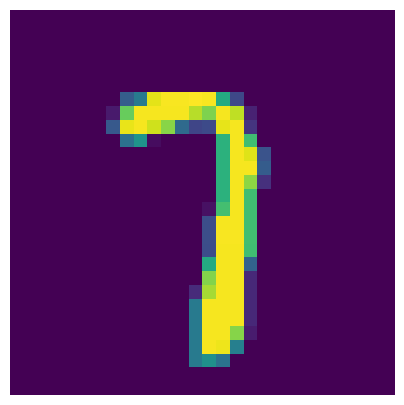

real data tensor(7)
Predicted tensor(7)


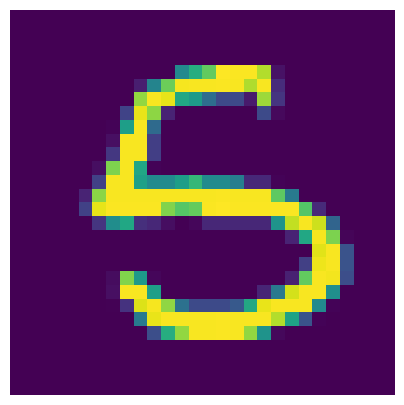

real data tensor(5)
Predicted tensor(5)


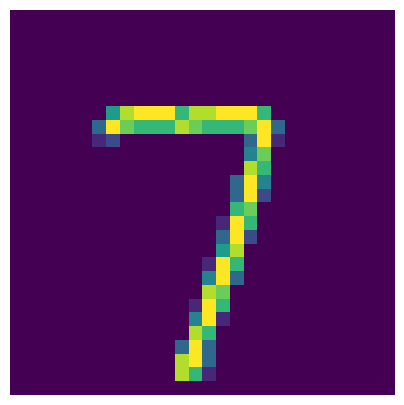

real data tensor(7)
Predicted tensor(7)


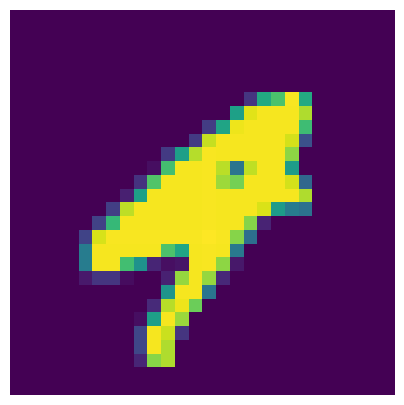

real data tensor(4)
Predicted tensor(4)


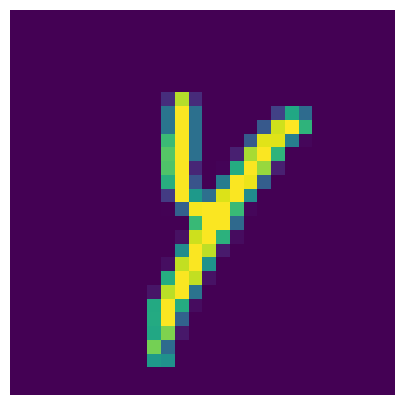

real data tensor(4)
Predicted tensor(4)


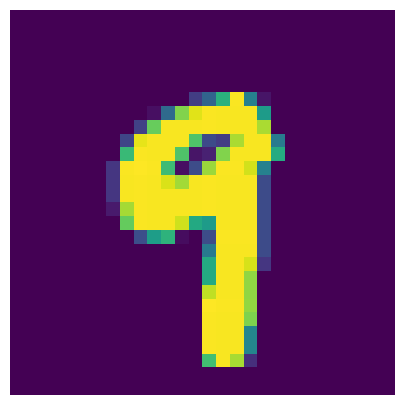

real data tensor(9)
Predicted tensor(9)


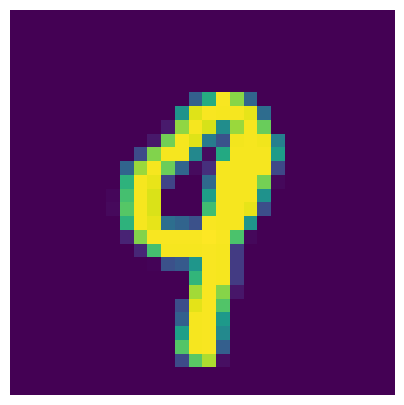

real data tensor(9)
Predicted tensor(9)


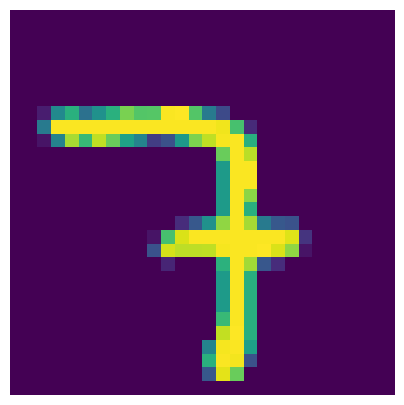

real data tensor(7)
Predicted tensor(7)


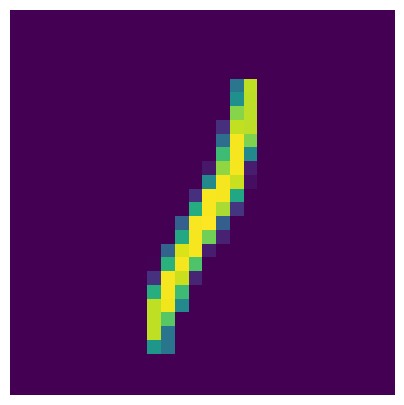

real data tensor(1)
Predicted tensor(1)


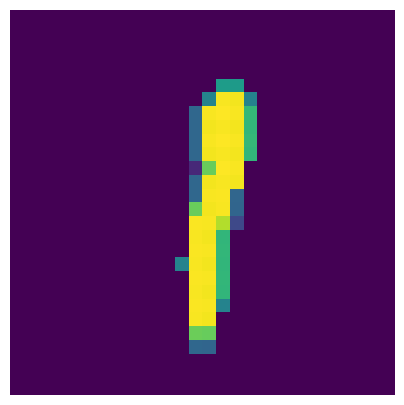

real data tensor(1)
Predicted tensor(1)


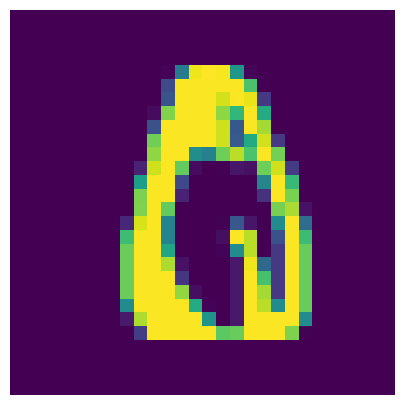

real data tensor(0)
Predicted tensor(0)


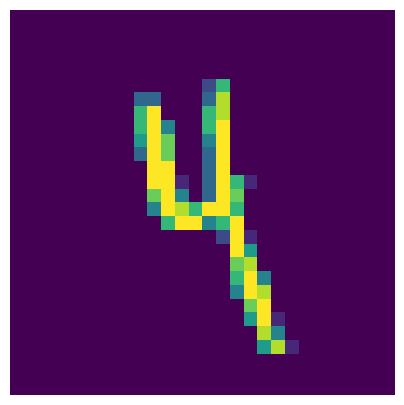

real data tensor(4)
Predicted tensor(4)


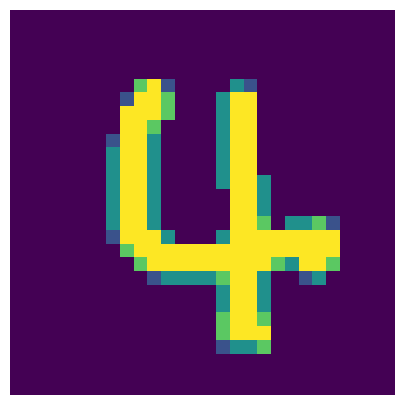

real data tensor(4)
Predicted tensor(4)


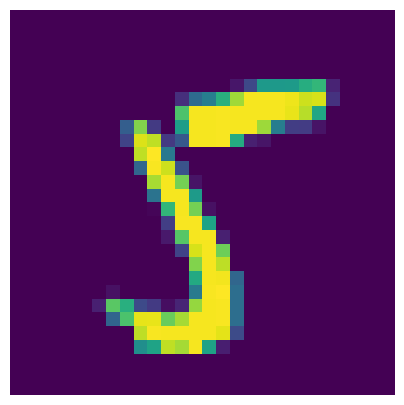

real data tensor(5)
Predicted tensor(5)


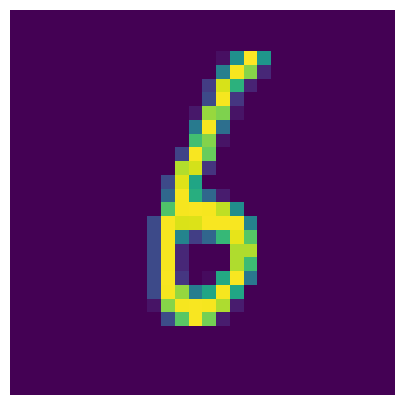

real data tensor(6)
Predicted tensor(6)


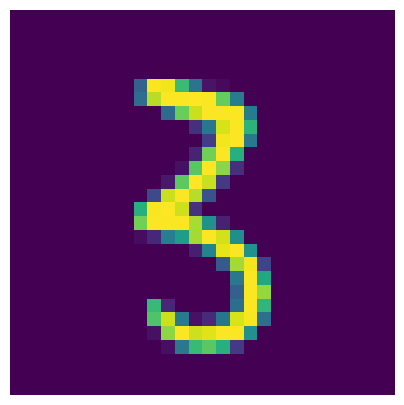

real data tensor(3)
Predicted tensor(3)


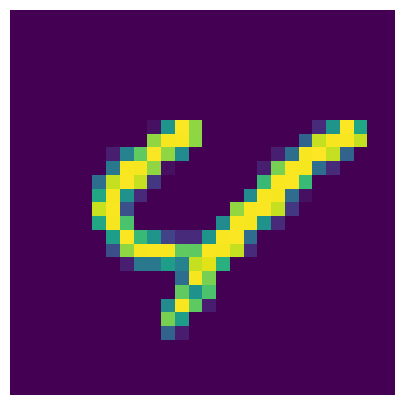

real data tensor(4)
Predicted tensor(4)


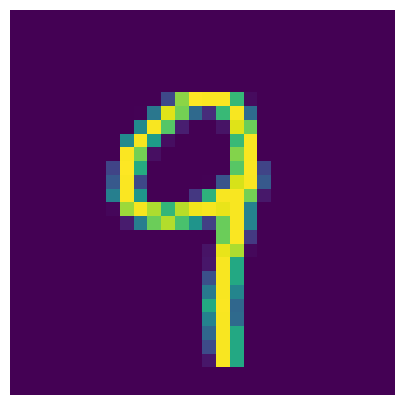

real data tensor(9)
Predicted tensor(9)


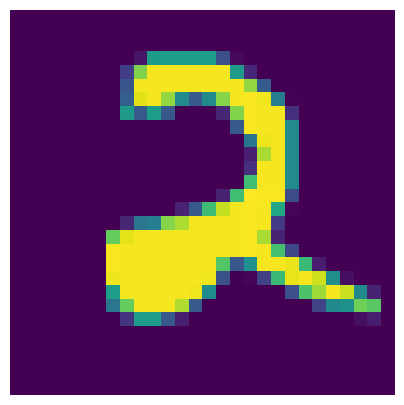

real data tensor(2)
Predicted tensor(2)


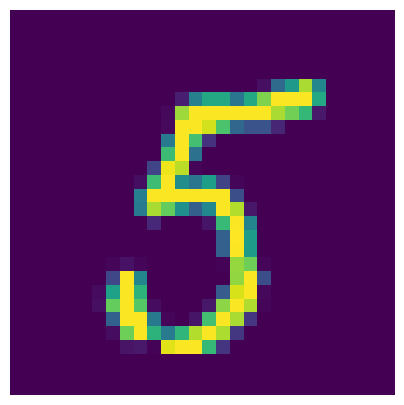

real data tensor(5)
Predicted tensor(5)


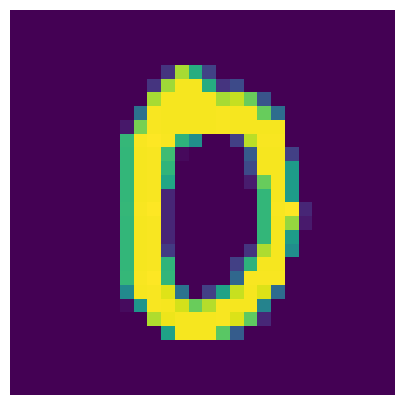

real data tensor(0)
Predicted tensor(0)


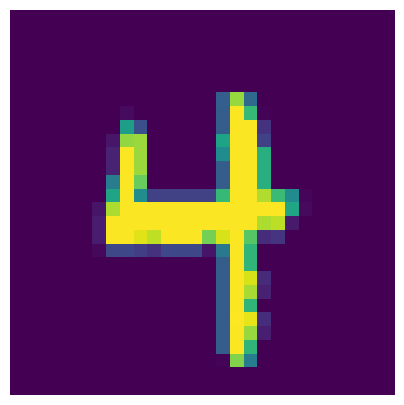

real data tensor(4)
Predicted tensor(4)


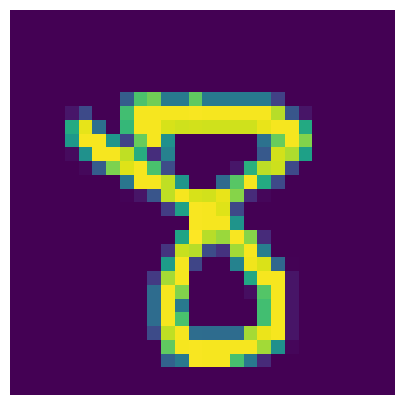

real data tensor(8)
Predicted tensor(8)


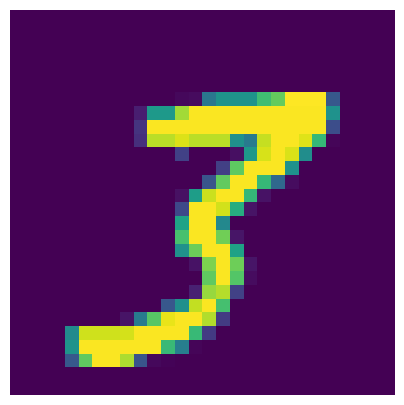

real data tensor(3)
Predicted tensor(3)


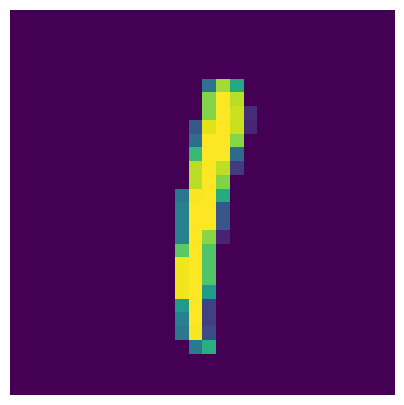

real data tensor(1)
Predicted tensor(1)


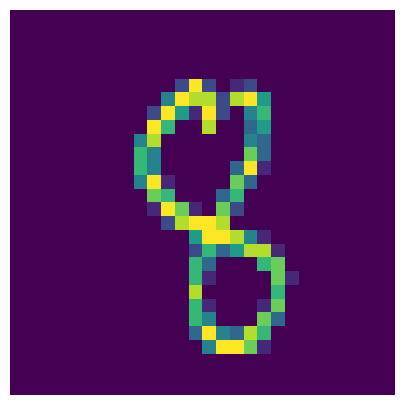

real data tensor(8)
Predicted tensor(8)


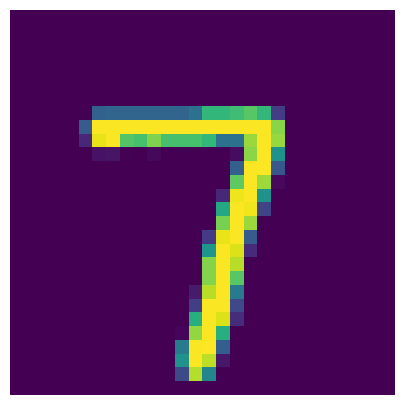

real data tensor(7)
Predicted tensor(7)


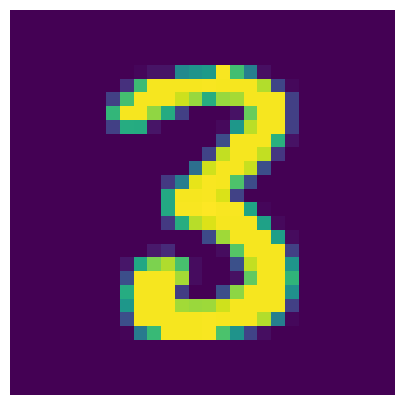

real data tensor(3)
Predicted tensor(3)


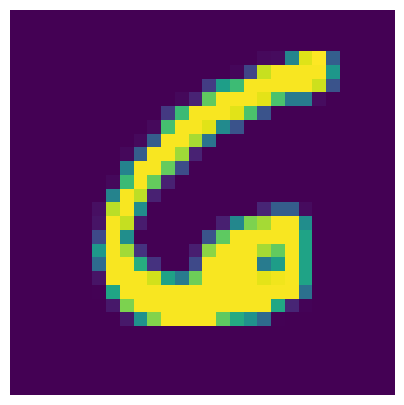

real data tensor(6)
Predicted tensor(6)


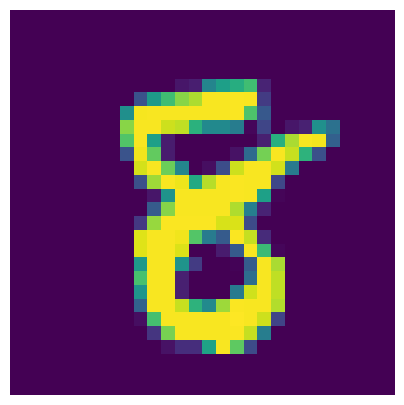

real data tensor(8)
Predicted tensor(8)


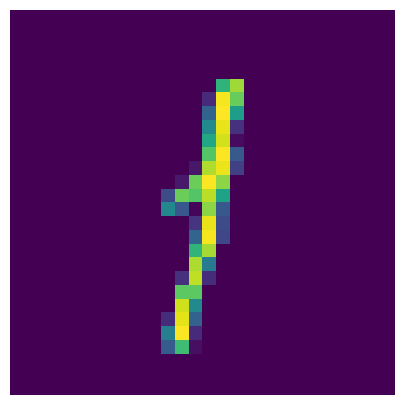

real data tensor(1)
Predicted tensor(1)


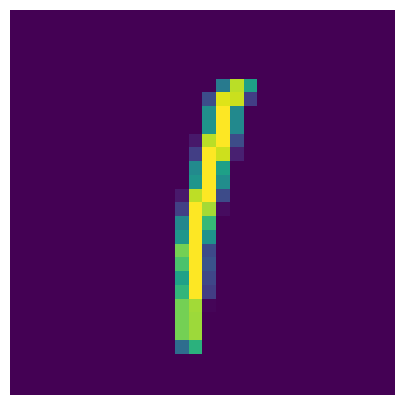

real data tensor(1)
Predicted tensor(1)


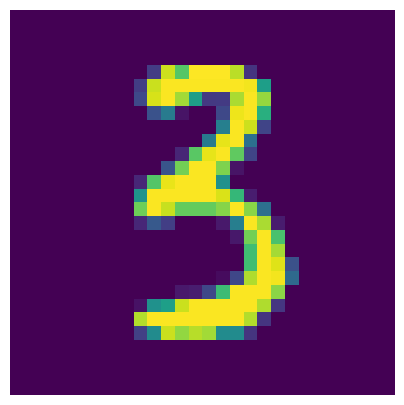

real data tensor(3)
Predicted tensor(3)


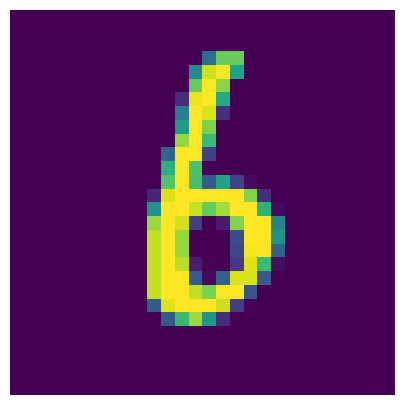

real data tensor(6)
Predicted tensor(6)


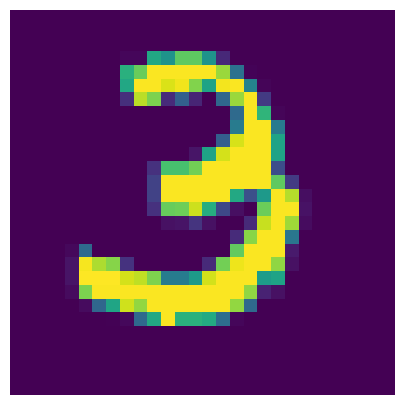

real data tensor(3)
Predicted tensor(3)


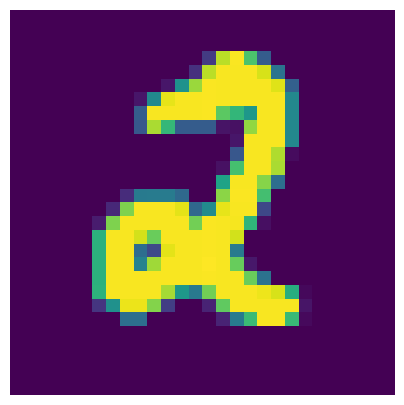

real data tensor(2)
Predicted tensor(2)


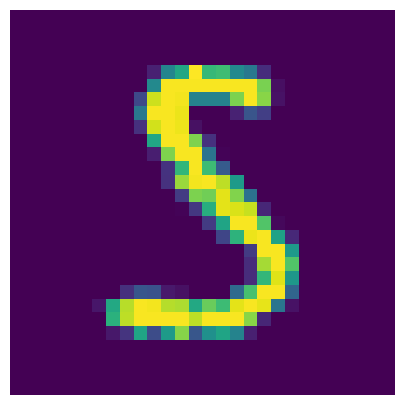

real data tensor(5)
Predicted tensor(5)


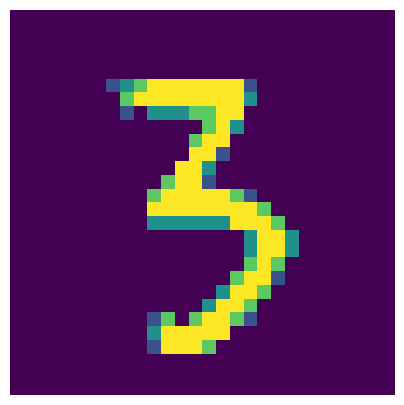

real data tensor(3)
Predicted tensor(3)


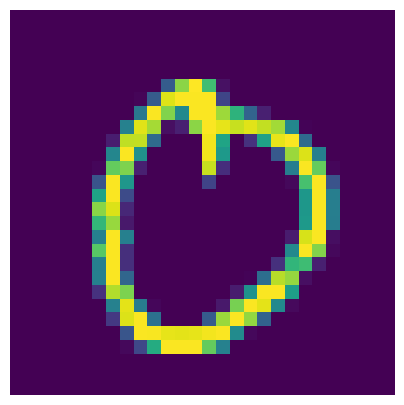

real data tensor(0)
Predicted tensor(0)


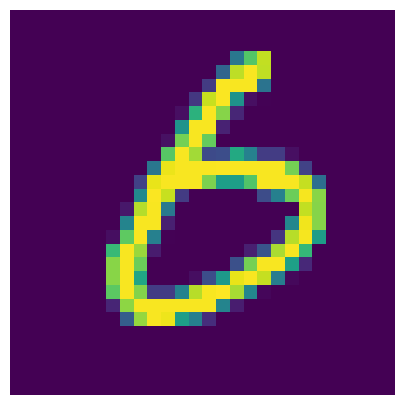

real data tensor(6)
Predicted tensor(6)


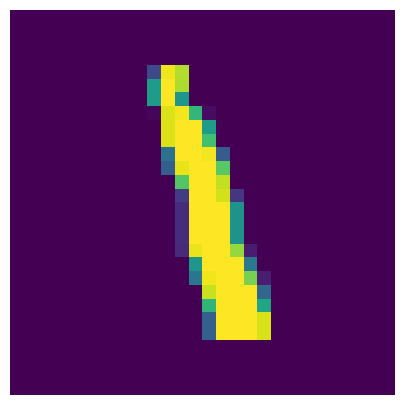

real data tensor(1)
Predicted tensor(1)


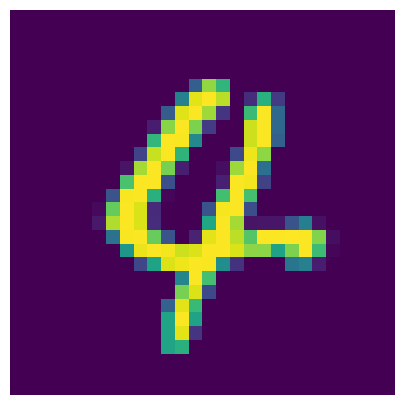

real data tensor(4)
Predicted tensor(4)


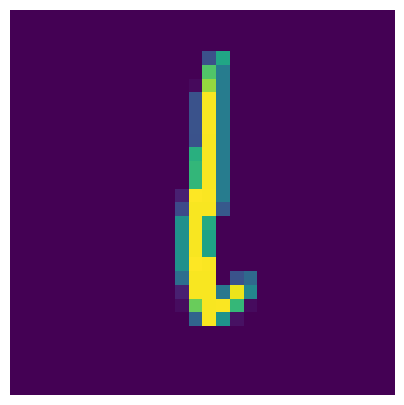

real data tensor(1)
Predicted tensor(1)


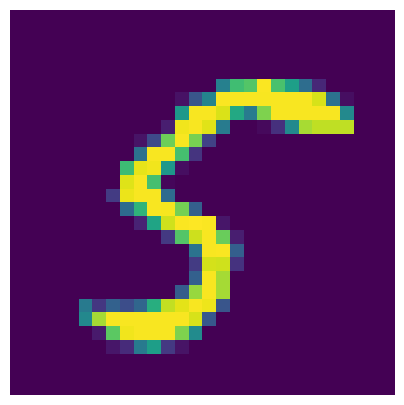

real data tensor(5)
Predicted tensor(5)


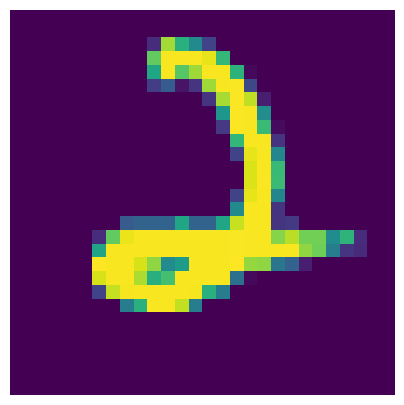

real data tensor(2)
Predicted tensor(2)


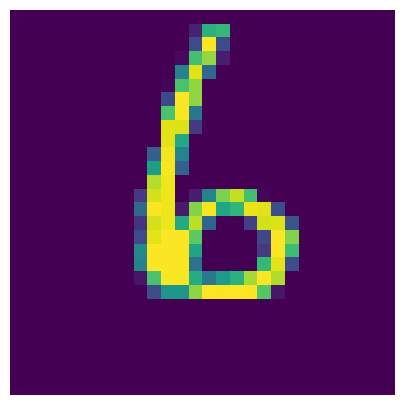

real data tensor(6)
Predicted tensor(6)


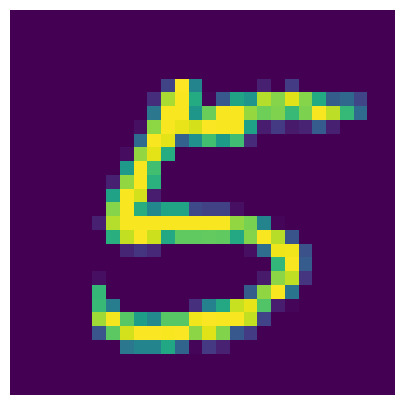

real data tensor(5)
Predicted tensor(5)


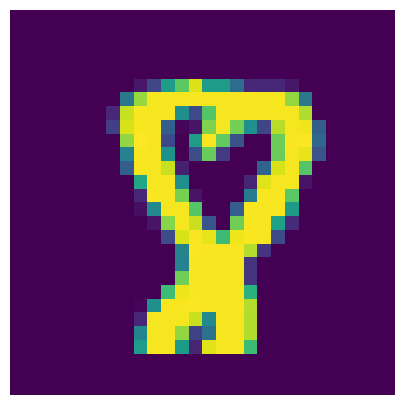

real data tensor(8)
Predicted tensor(8)


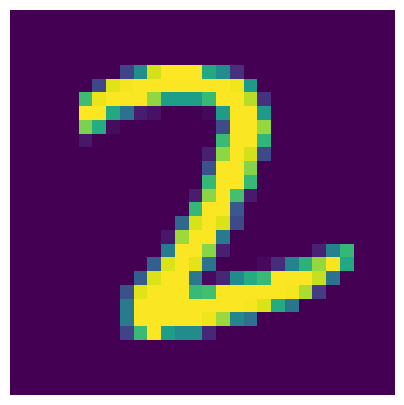

real data tensor(2)
Predicted tensor(2)


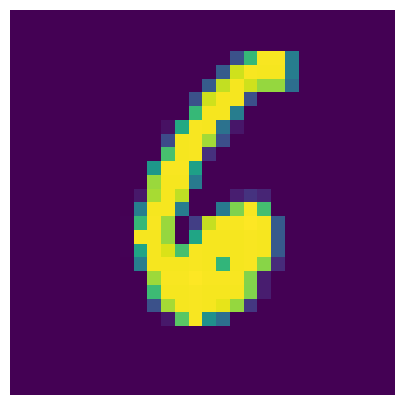

real data tensor(6)
Predicted tensor(6)


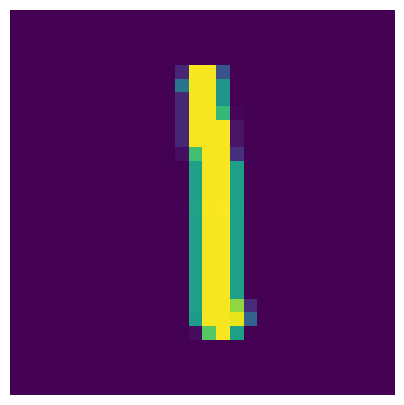

real data tensor(1)
Predicted tensor(1)


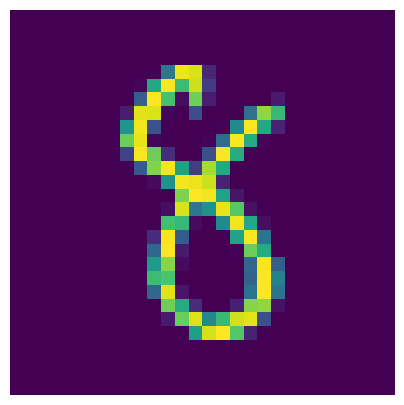

real data tensor(8)
Predicted tensor(8)


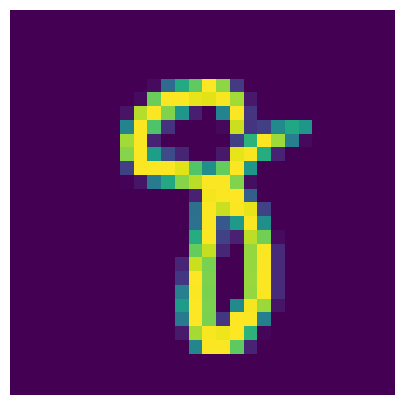

real data tensor(8)
Predicted tensor(8)


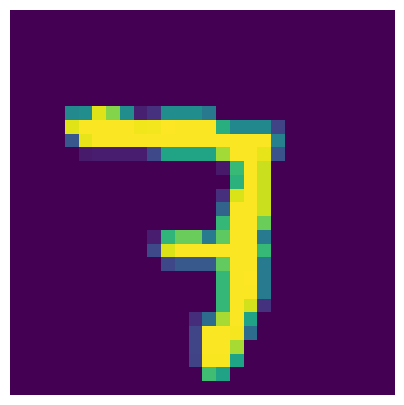

real data tensor(7)
Predicted tensor(7)


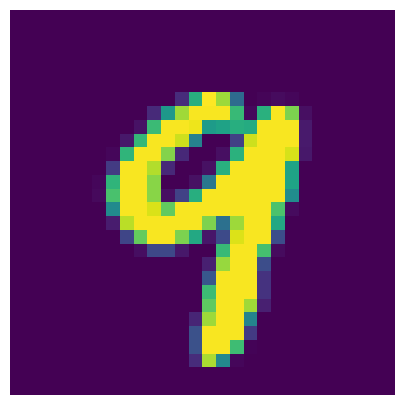

real data tensor(9)
Predicted tensor(9)


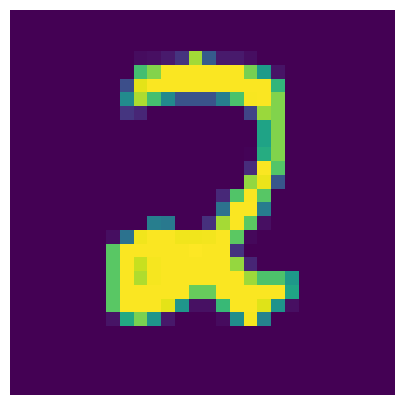

real data tensor(2)
Predicted tensor(2)


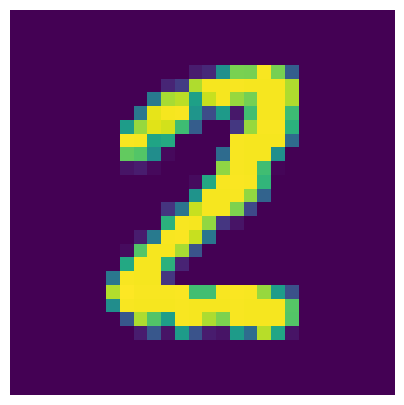

real data tensor(2)
Predicted tensor(2)


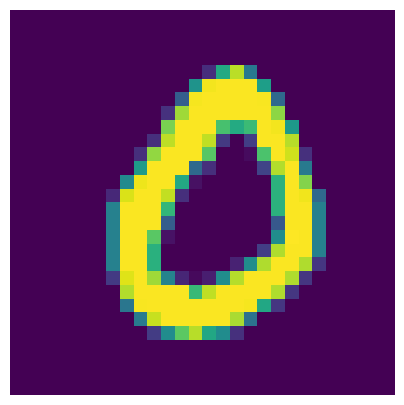

real data tensor(0)
Predicted tensor(0)


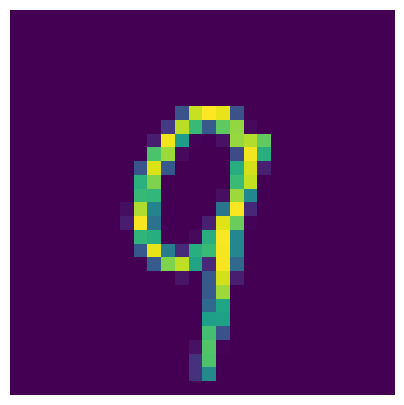

real data tensor(9)
Predicted tensor(9)


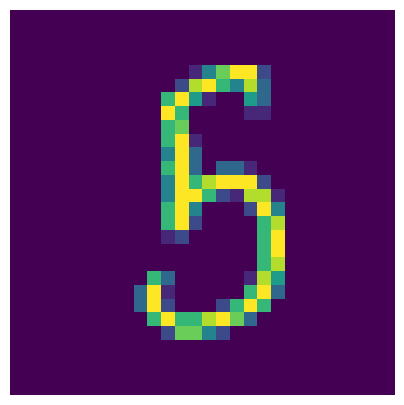

real data tensor(5)
Predicted tensor(5)


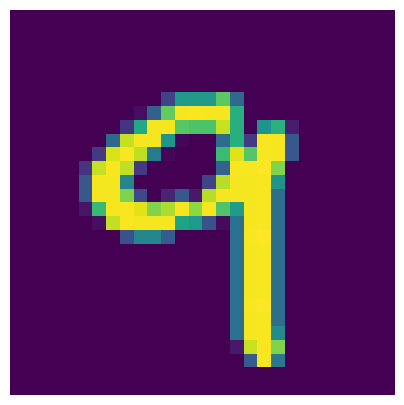

real data tensor(9)
Predicted tensor(9)


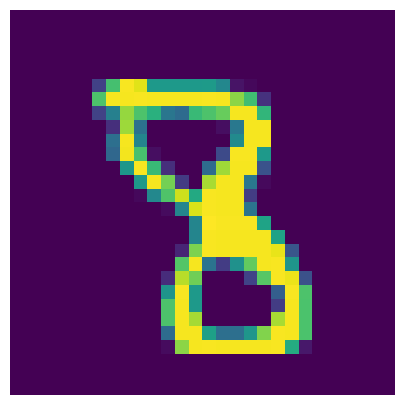

real data tensor(8)
Predicted tensor(8)


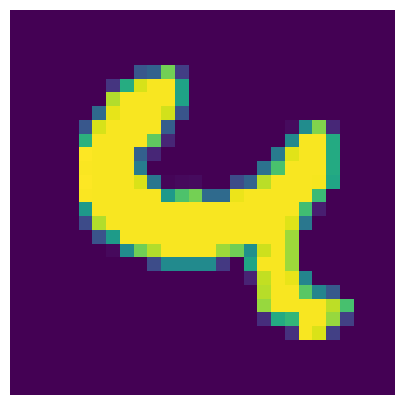

real data tensor(4)
Predicted tensor(4)


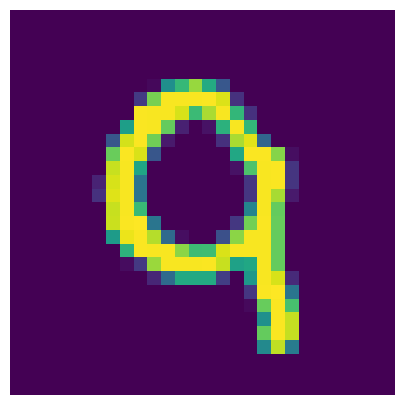

real data tensor(9)
Predicted tensor(9)


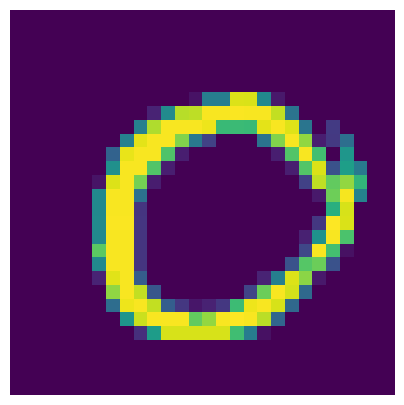

real data tensor(0)
Predicted tensor(0)


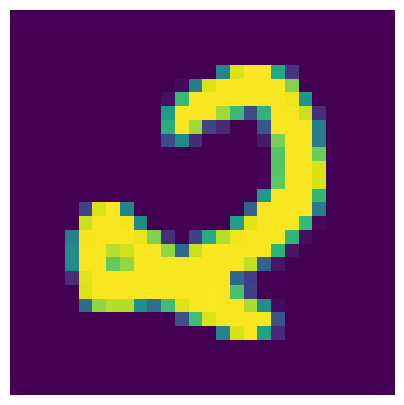

real data tensor(2)
Predicted tensor(2)


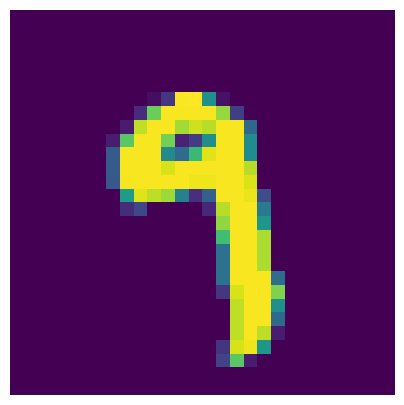

real data tensor(9)
Predicted tensor(9)


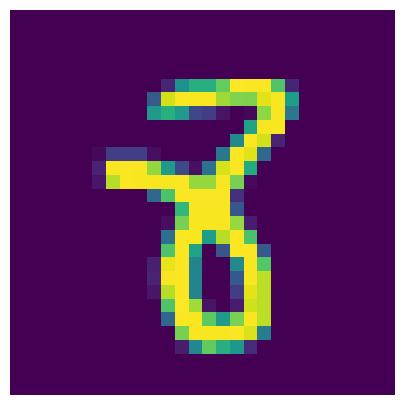

real data tensor(8)
Predicted tensor(8)


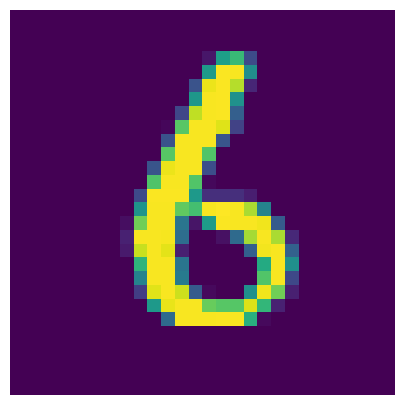

real data tensor(6)
Predicted tensor(6)


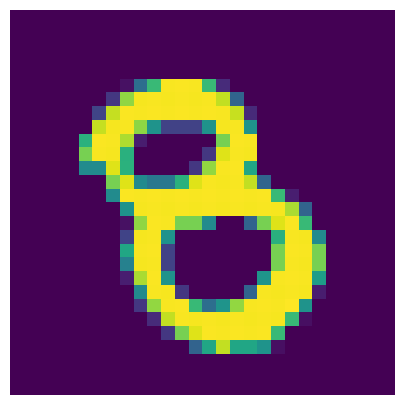

real data tensor(8)
Predicted tensor(8)


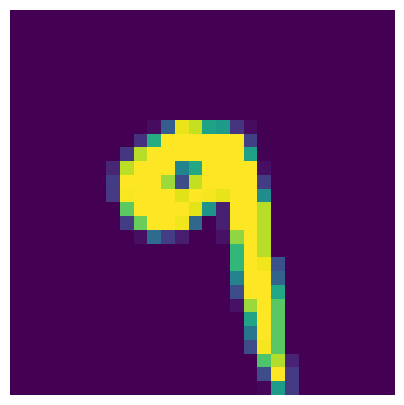

real data tensor(9)
Predicted tensor(9)


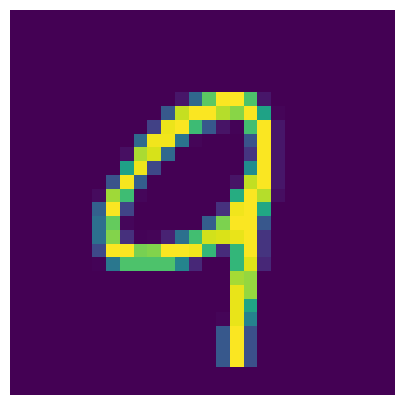

real data tensor(9)
Predicted tensor(9)


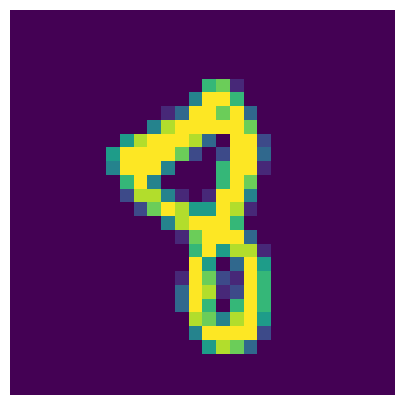

real data tensor(8)
Predicted tensor(8)


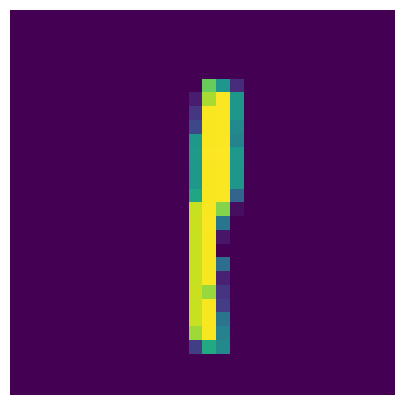

real data tensor(1)
Predicted tensor(1)


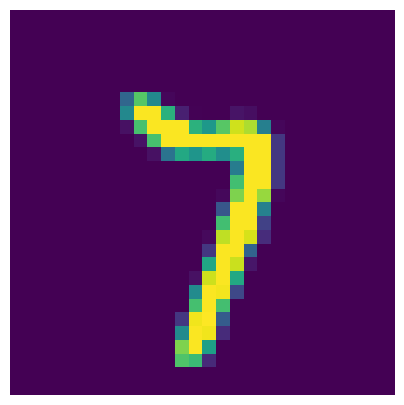

real data tensor(7)
Predicted tensor(7)


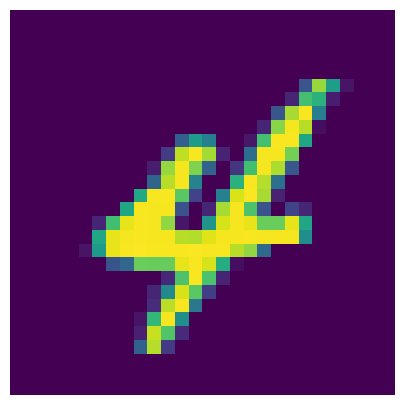

real data tensor(4)
Predicted tensor(4)


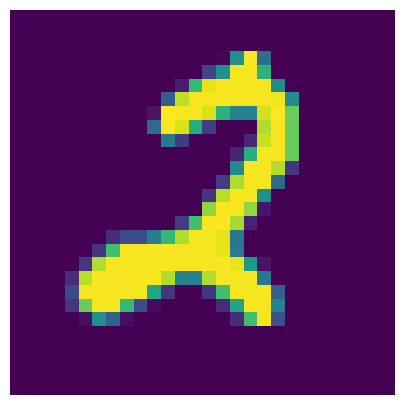

real data tensor(2)
Predicted tensor(2)


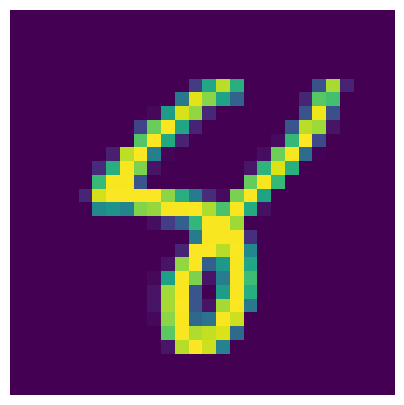

real data tensor(8)
Predicted tensor(8)


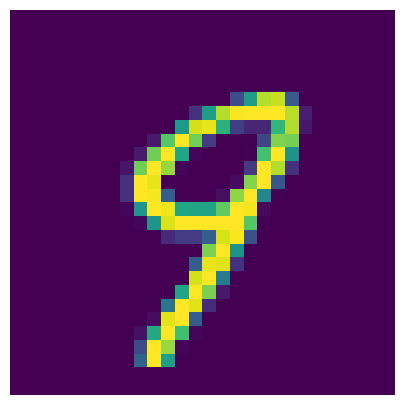

real data tensor(9)
Predicted tensor(9)


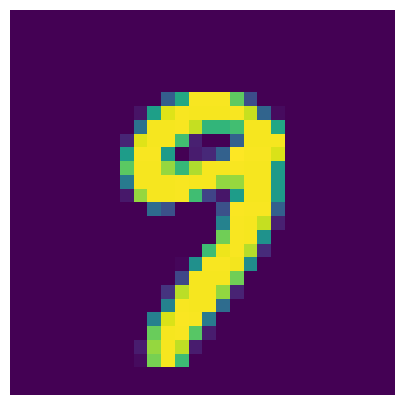

real data tensor(9)
Predicted tensor(9)


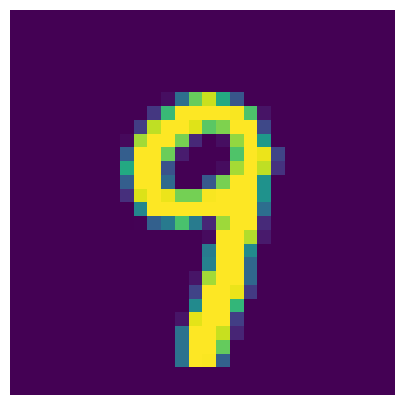

real data tensor(9)
Predicted tensor(9)


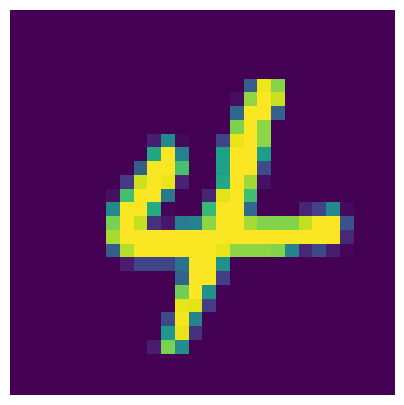

real data tensor(4)
Predicted tensor(4)


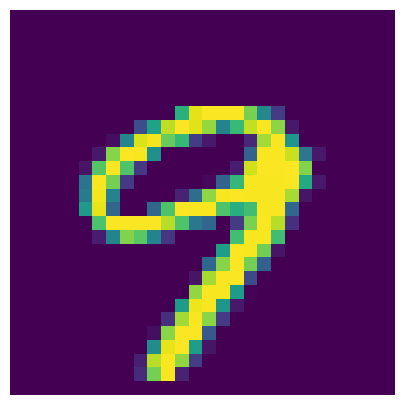

real data tensor(9)
Predicted tensor(9)


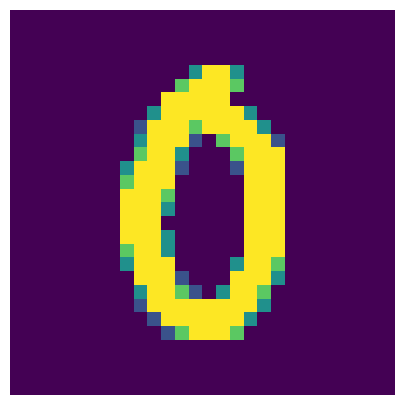

real data tensor(0)
Predicted tensor(0)


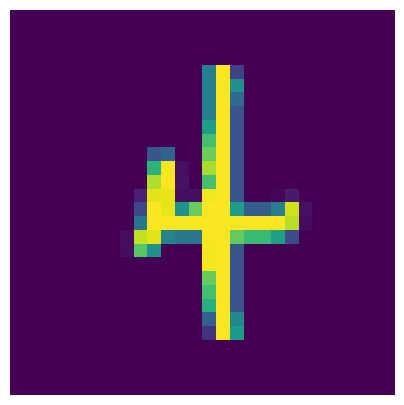

real data tensor(4)
Predicted tensor(4)


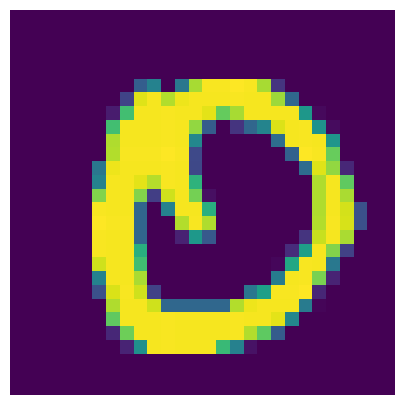

real data tensor(0)
Predicted tensor(0)


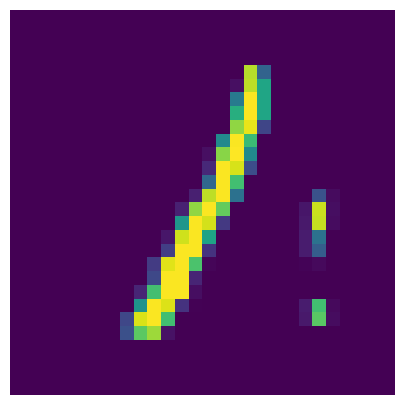

real data tensor(1)
Predicted tensor(1)


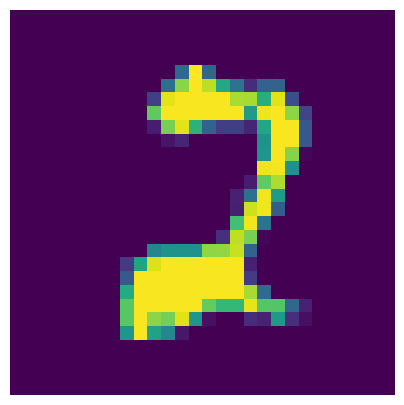

real data tensor(2)
Predicted tensor(2)


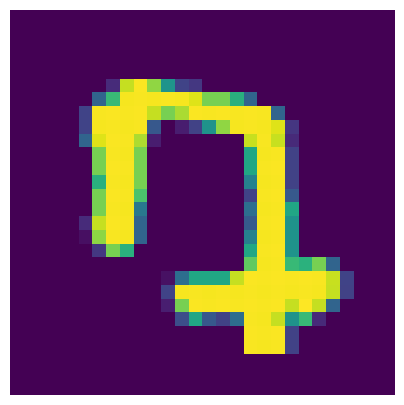

real data tensor(7)
Predicted tensor(7)


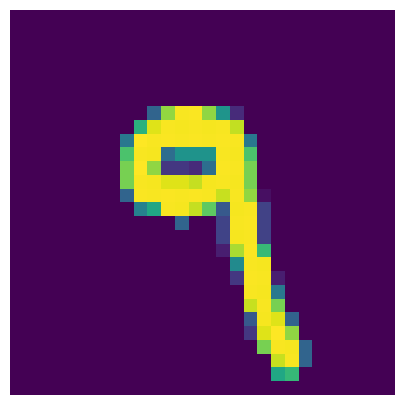

real data tensor(9)
Predicted tensor(9)


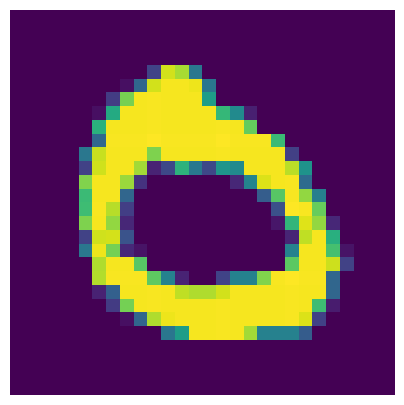

real data tensor(0)
Predicted tensor(0)


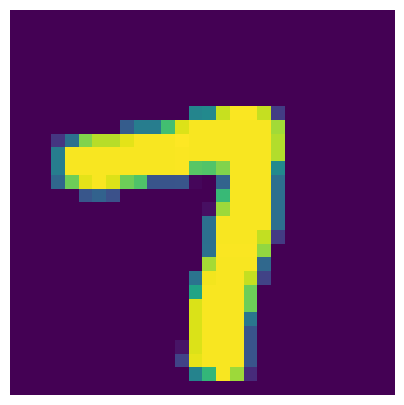

real data tensor(7)
Predicted tensor(7)


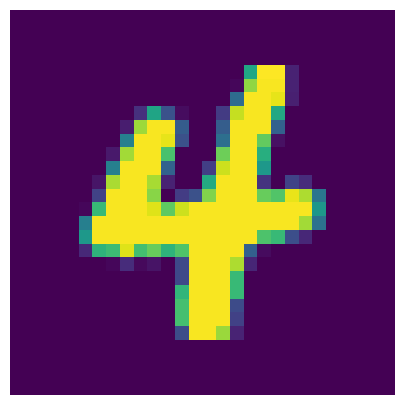

real data tensor(4)
Predicted tensor(4)


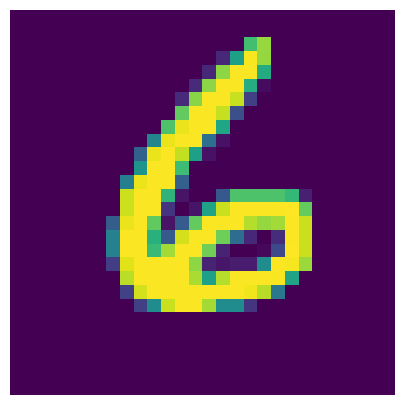

real data tensor(6)
Predicted tensor(6)


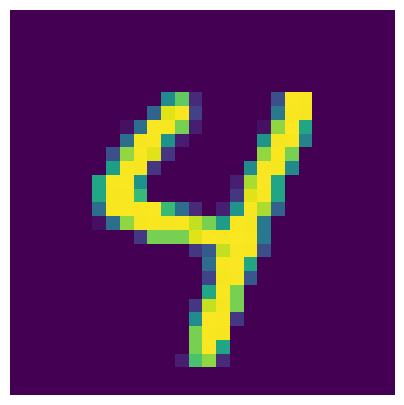

real data tensor(4)
Predicted tensor(4)


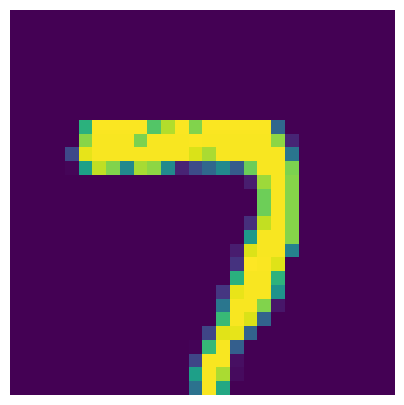

real data tensor(7)
Predicted tensor(7)


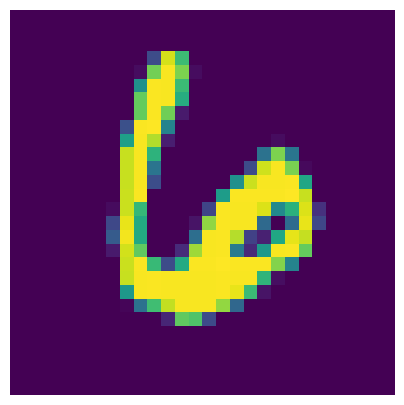

real data tensor(6)
Predicted tensor(6)


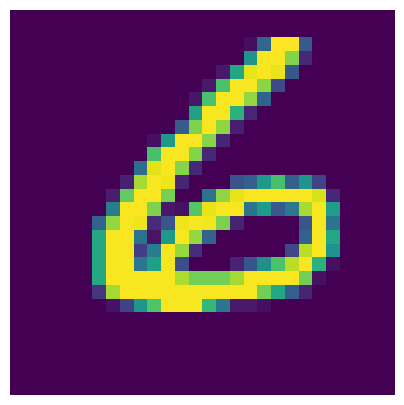

real data tensor(6)
Predicted tensor(6)


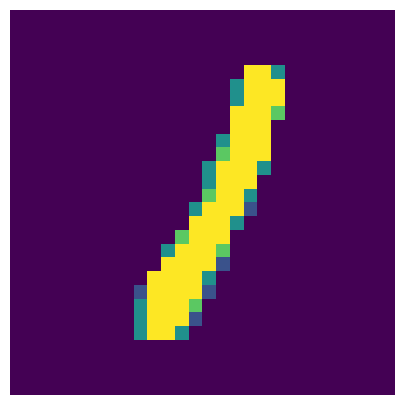

real data tensor(1)
Predicted tensor(1)


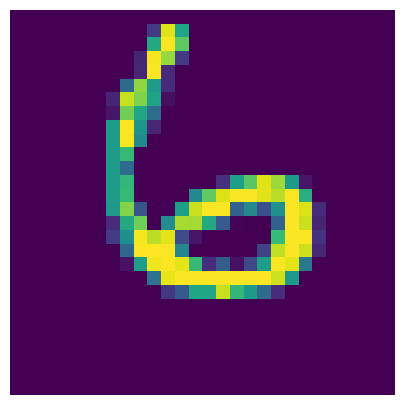

real data tensor(6)
Predicted tensor(6)


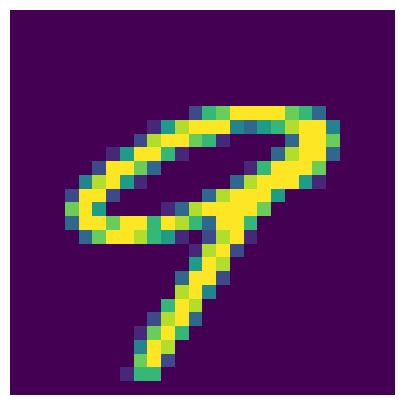

real data tensor(9)
Predicted tensor(9)


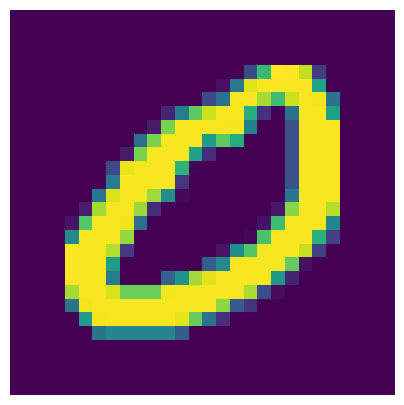

real data tensor(0)
Predicted tensor(0)


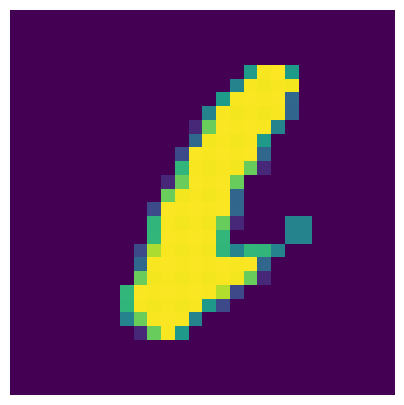

real data tensor(1)
Predicted tensor(6)


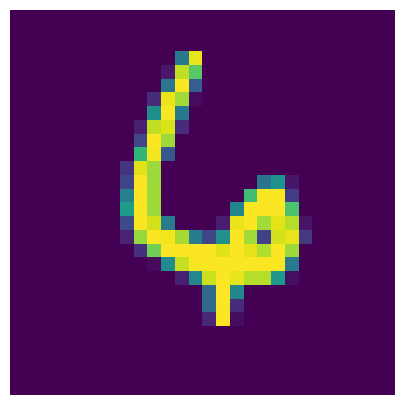

real data tensor(6)
Predicted tensor(4)


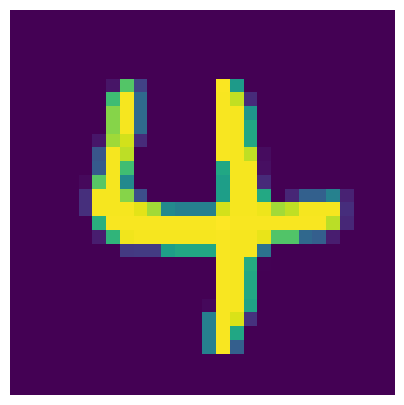

real data tensor(4)
Predicted tensor(4)


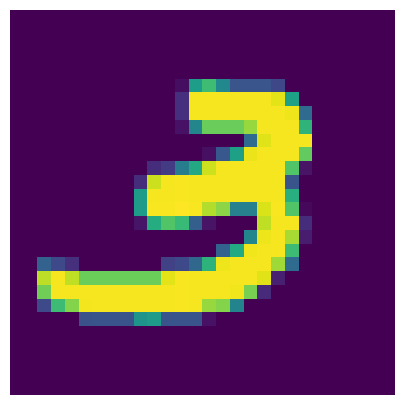

real data tensor(3)
Predicted tensor(3)


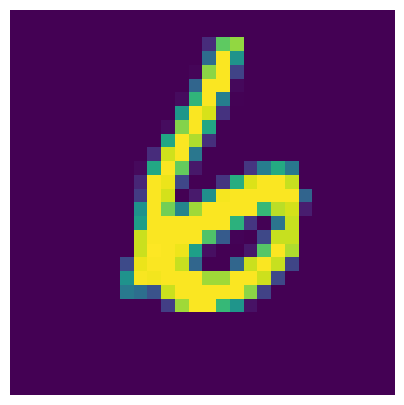

real data tensor(6)
Predicted tensor(6)


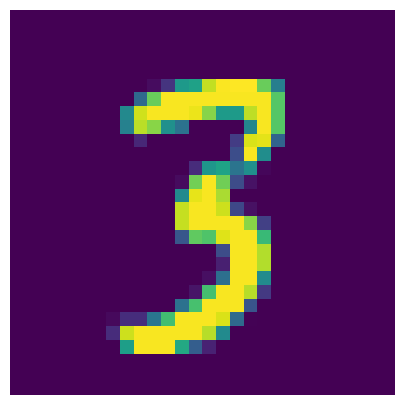

real data tensor(3)
Predicted tensor(3)


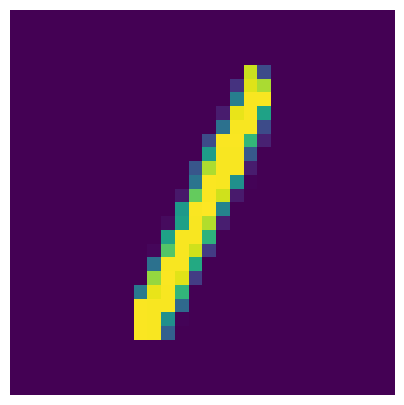

real data tensor(1)
Predicted tensor(1)


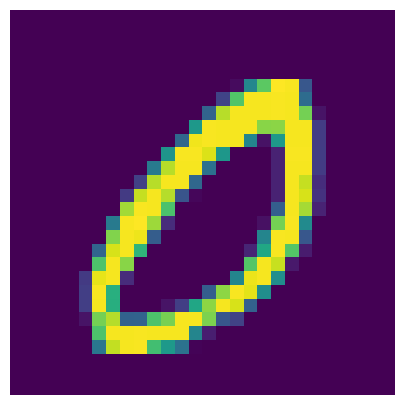

real data tensor(0)
Predicted tensor(0)


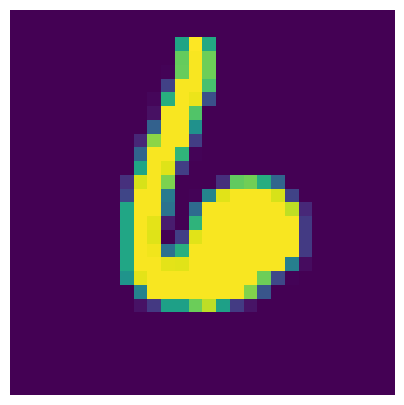

real data tensor(6)
Predicted tensor(6)


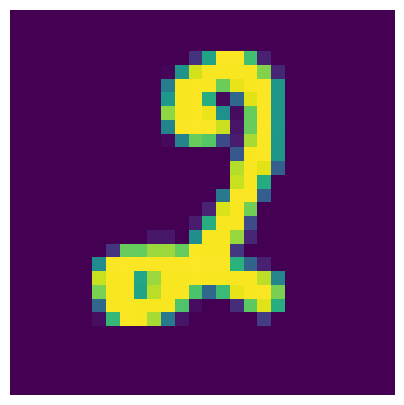

real data tensor(2)
Predicted tensor(2)


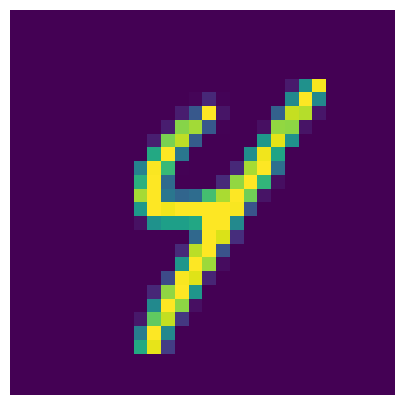

real data tensor(4)
Predicted tensor(4)


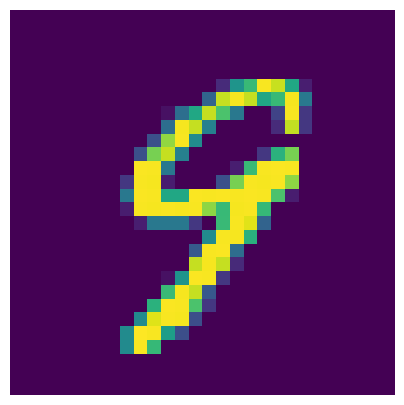

real data tensor(9)
Predicted tensor(9)


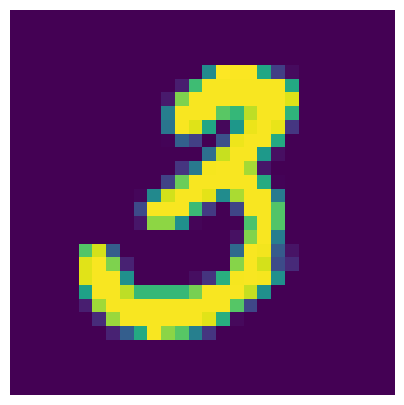

real data tensor(3)
Predicted tensor(3)


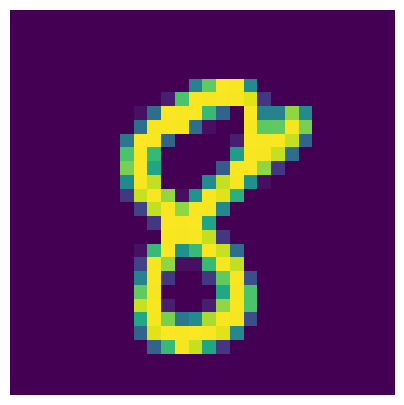

real data tensor(8)
Predicted tensor(8)


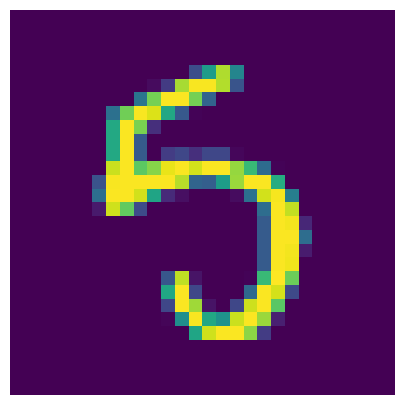

real data tensor(5)
Predicted tensor(5)


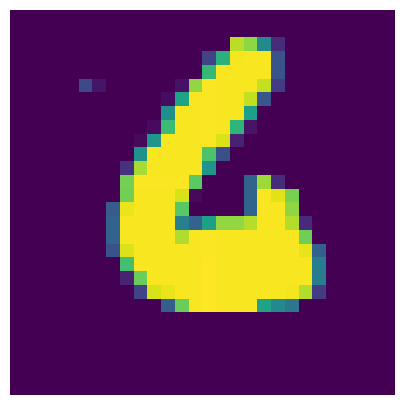

real data tensor(6)
Predicted tensor(6)


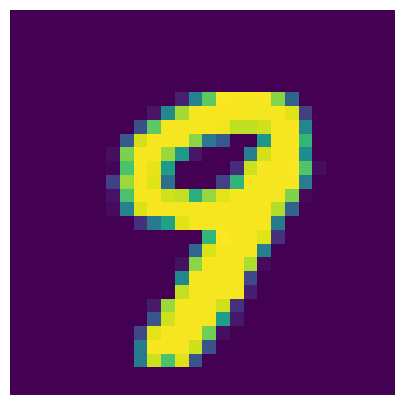

real data tensor(9)
Predicted tensor(9)


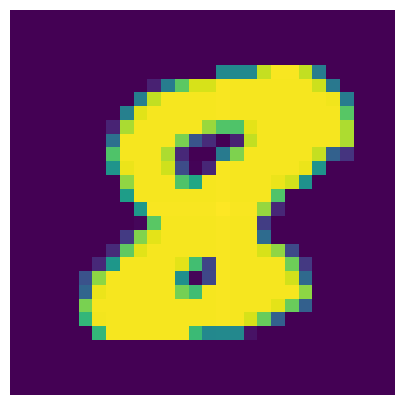

real data tensor(8)
Predicted tensor(8)


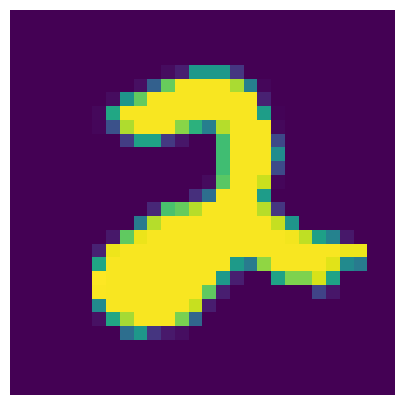

real data tensor(2)
Predicted tensor(2)


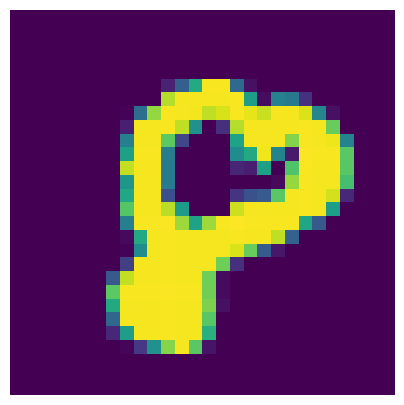

real data tensor(8)
Predicted tensor(8)


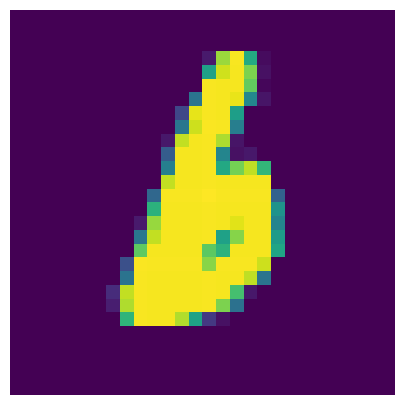

real data tensor(6)
Predicted tensor(6)


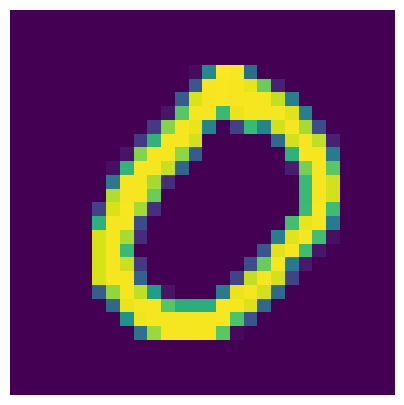

real data tensor(0)
Predicted tensor(0)


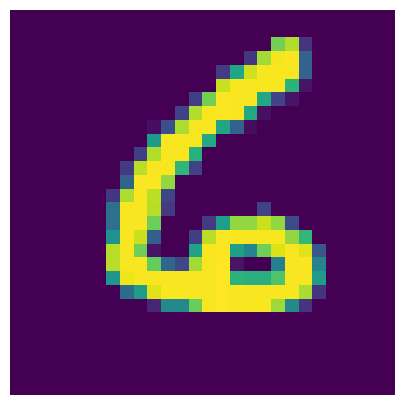

real data tensor(6)
Predicted tensor(6)


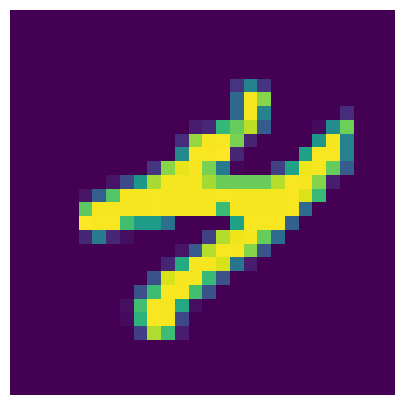

real data tensor(4)
Predicted tensor(4)


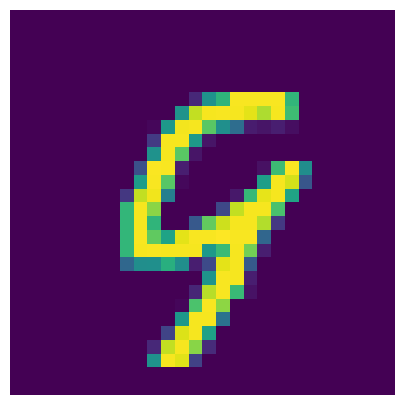

real data tensor(9)
Predicted tensor(9)


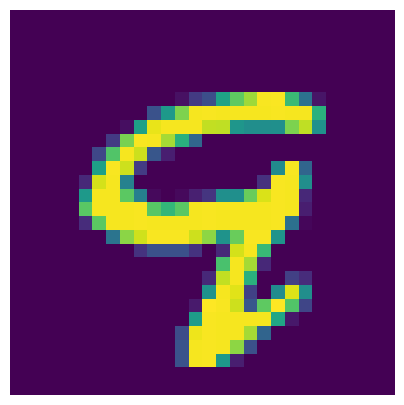

real data tensor(9)
Predicted tensor(9)


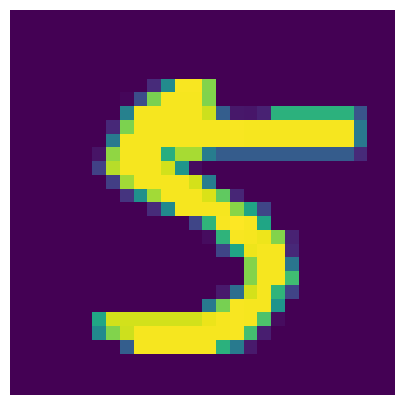

real data tensor(5)
Predicted tensor(5)


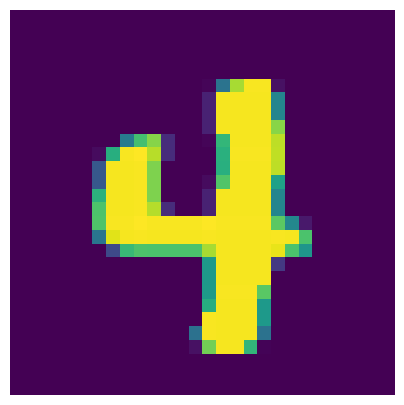

real data tensor(4)
Predicted tensor(4)


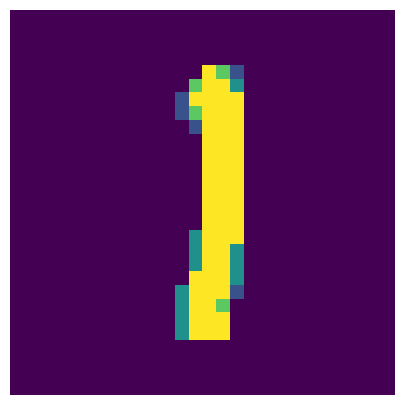

real data tensor(1)
Predicted tensor(1)


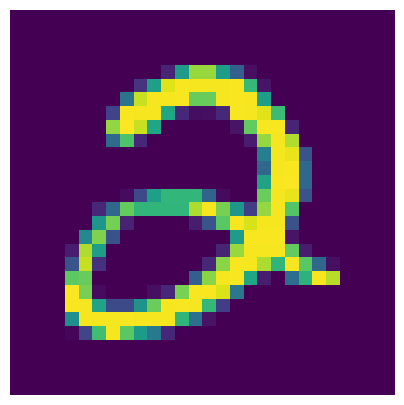

real data tensor(2)
Predicted tensor(2)


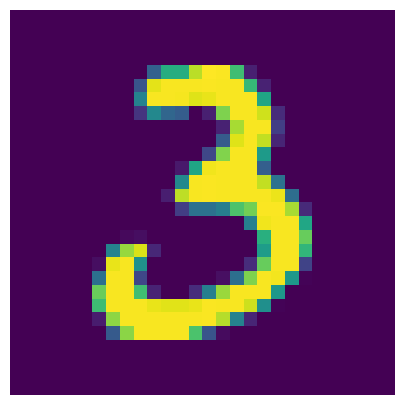

real data tensor(3)
Predicted tensor(3)


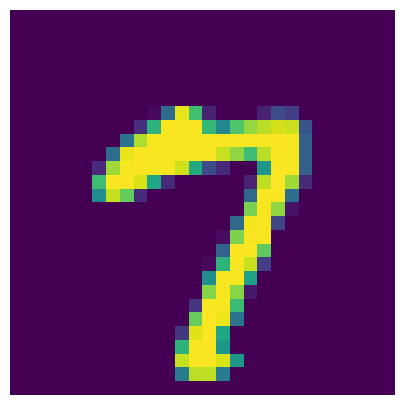

real data tensor(7)
Predicted tensor(7)


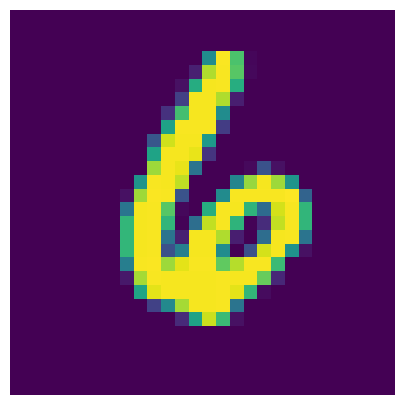

real data tensor(6)
Predicted tensor(6)


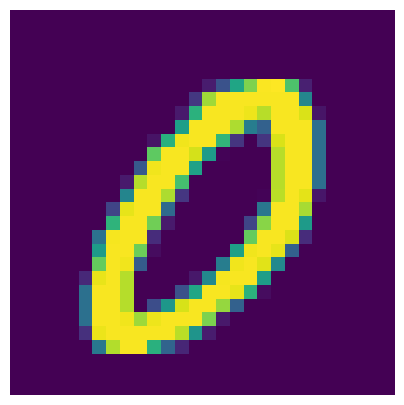

real data tensor(0)
Predicted tensor(0)


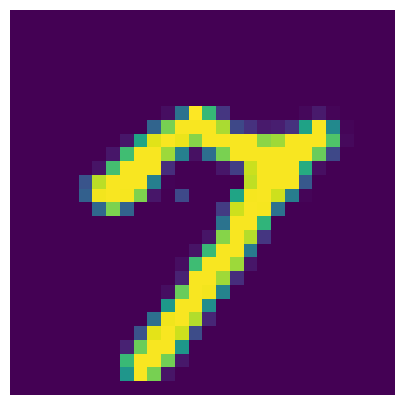

real data tensor(7)
Predicted tensor(7)


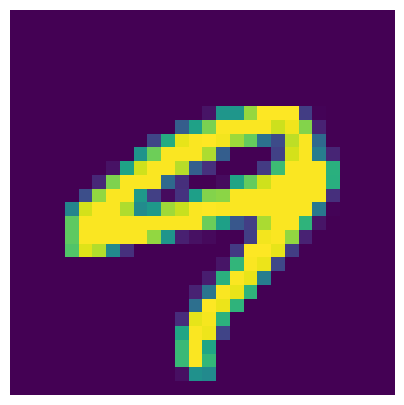

real data tensor(9)
Predicted tensor(9)


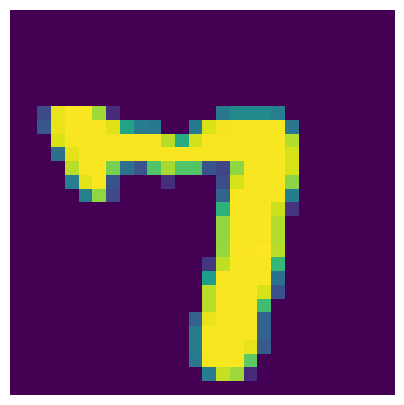

real data tensor(7)
Predicted tensor(7)


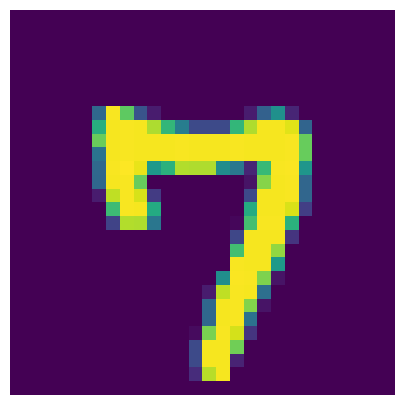

real data tensor(7)
Predicted tensor(7)


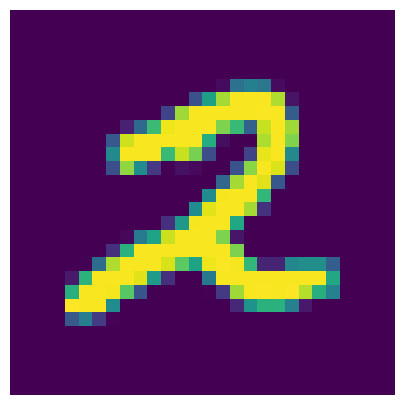

real data tensor(2)
Predicted tensor(2)


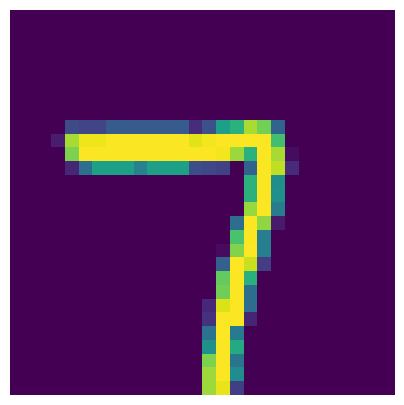

real data tensor(7)
Predicted tensor(7)


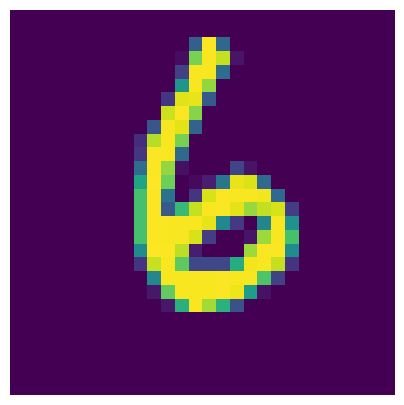

real data tensor(6)
Predicted tensor(6)


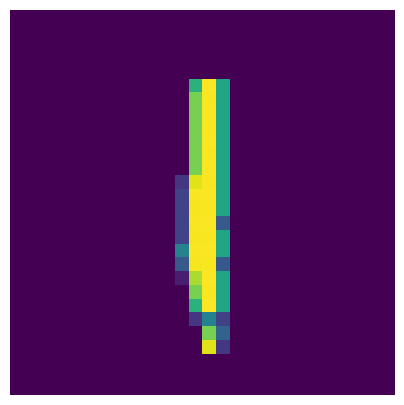

real data tensor(1)
Predicted tensor(1)


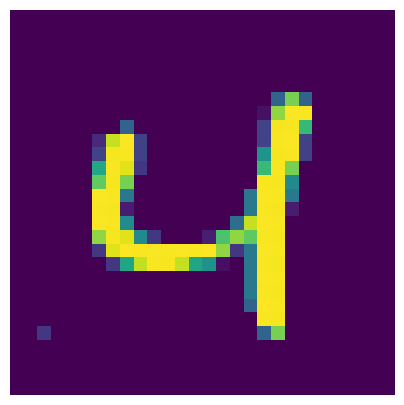

real data tensor(4)
Predicted tensor(4)


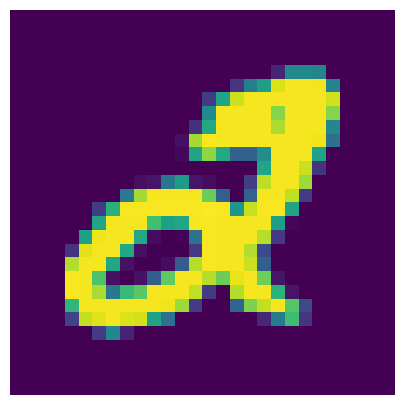

real data tensor(2)
Predicted tensor(2)


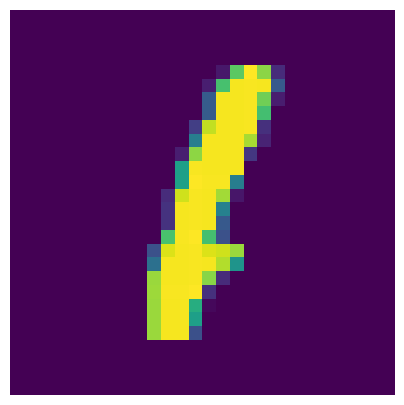

real data tensor(1)
Predicted tensor(1)


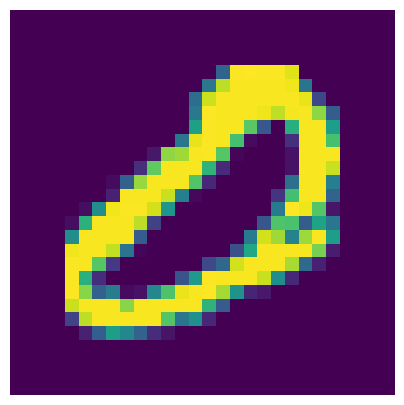

real data tensor(0)
Predicted tensor(0)


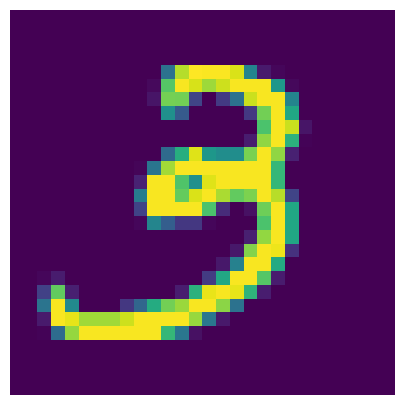

real data tensor(3)
Predicted tensor(3)


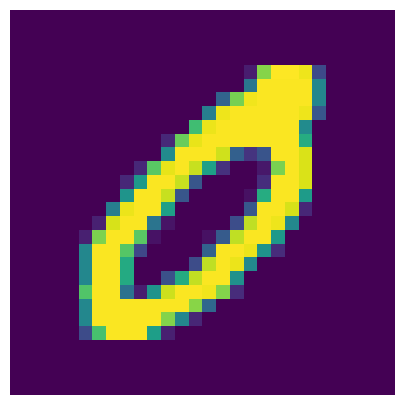

real data tensor(0)
Predicted tensor(0)


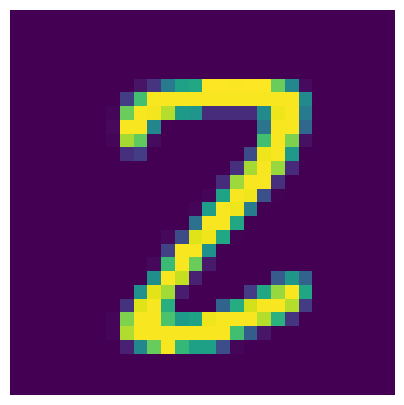

real data tensor(2)
Predicted tensor(2)


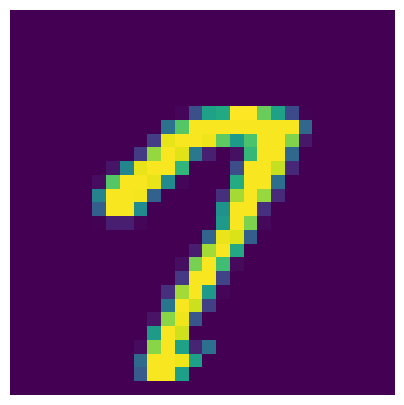

real data tensor(7)
Predicted tensor(7)


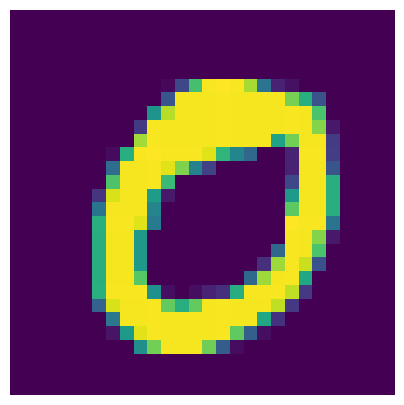

real data tensor(0)
Predicted tensor(0)
Accuracy of the network on the 10000 test images: 98.65 %


In [10]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total%batch_size==0:
            image = images[-1].reshape(28,28)
            plt.figure(figsize = (5,5))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
            print("real data", labels[-1])
            print("Predicted", predicted[-1])
        
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

### You can try to establish your own neural network work, and see if you can improve the performance of the classfication


